# SPAM MAIL CLASSIFICATION USING MACHINE LEARNING¶

### Objective
In this project we are going to classify mails into spam or ham by using Machine Learning.

In this project we classify the mails into spam or ham using three models and they are:

1)Logistic Regression

2)Support Vector Machine

3)Random Forest

In [3]:
#import some required libraries
import numpy as np
import pandas as pd
import os
os.chdir("D:\pandas")

In [4]:
#import the dataset
data= pd.read_csv('spam new.csv')

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.shape

(5572, 5)

### Steps involved
#### 1. Data cleaning
It is the process of fixing or removing incorrect,corrupted, incorrectly formatted, uplicated, or incomplete data within a dataset.

#### 2. EDA
Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

#### 3. Data Preprocessing
Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.

#### 4. Model building
We begin data modeling by feature extraction .Feature extraction refers to the process of transforming raw data into numerical features that can be processed while preserving the information in the original dataset. It yields better result than applying machine learning directly to the raw data. Then we fit each model.

#### 5. Evaluation
Atlast, we compare the accuracy of three models and conclude that the model with high accuracy is the best model for the classification of spam mails

# 1. Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 cols
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [10]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
data.shape

(5572, 2)

In [13]:
# renaming the cols
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.sample(5)

,target,text
4529,ham,Don't forget though that I love you .... And I...
738,ham,Wish i were with you now!
2447,ham,Tmr then �_ brin lar... Aiya later i come n c ...
1101,ham,"Yeah go on then, bored and depressed sittin wa..."
3841,ham,"chile, please! It's only a &lt;DECIMAL&gt; h..."


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
data['target'] = encoder.fit_transform(data['target'])

In [16]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# check for duplicate values
data.duplicated().sum()

403

In [19]:
# remove duplicates
data = data.drop_duplicates(keep='first')

In [20]:
data.duplicated().sum()

0

In [21]:
data.shape

(5169, 2)

# 2.EDA

In [22]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

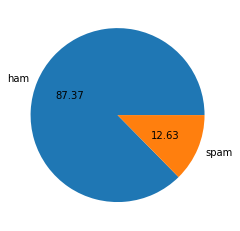

In [24]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

###### Data is imbalanced.That is,87.37% mails are ham and 12.63% mails are spam.

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [27]:
data['num_characters'] = data['text'].apply(len)

<ipython-input-27-2009d4c05f2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters'] = data['text'].apply(len)


In [28]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# num of words
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-29-e87dca8c5fdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [30]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-31-c5b2a9d04dbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


###### we calculated number of characters, number of words and number of sentences in each mail and it is added to the dataset as three columns.

In [32]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# ham
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

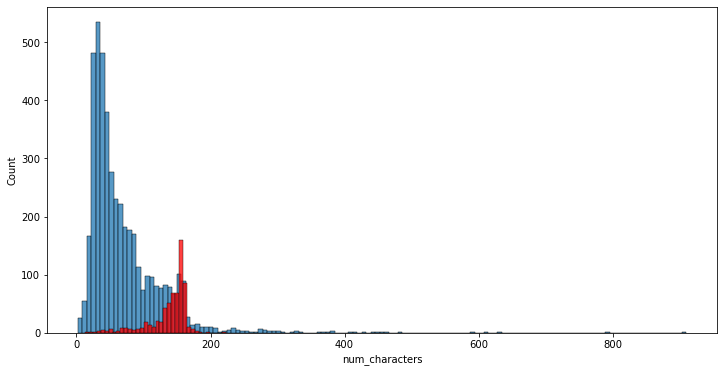

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'],color='red')

###### This is the graphical representation of number of characters in ham and spam, in which red indicates spam and blue indicates ham mails.

<AxesSubplot:xlabel='num_words', ylabel='Count'>

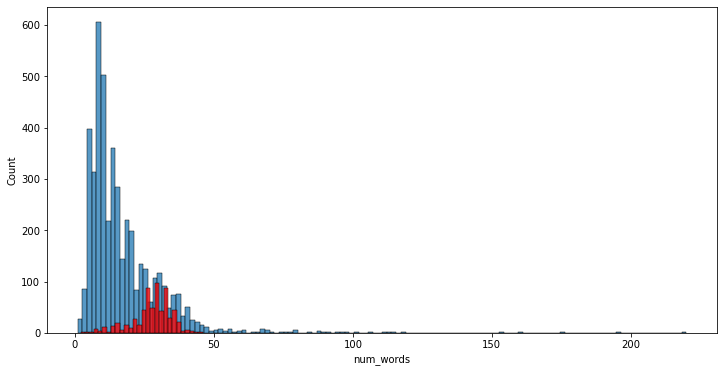

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

###### This is the graphical representation of number of words in ham and spam¶

###### From the two plots we can conclude that ham mails have more number of characters and number of words than in spam mails.

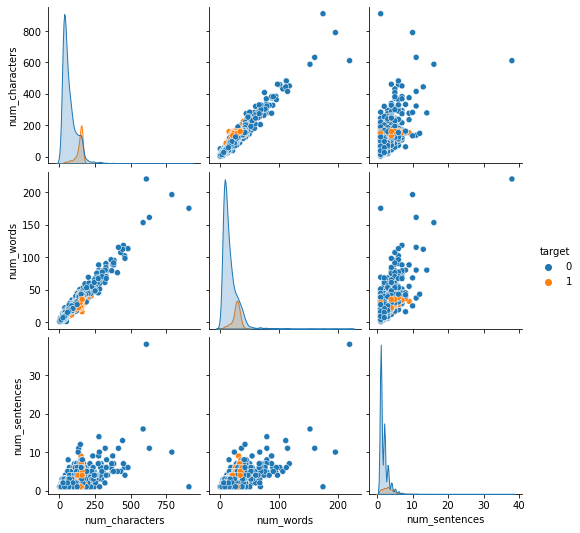

In [39]:
sns.pairplot(data,hue='target')

<AxesSubplot:>

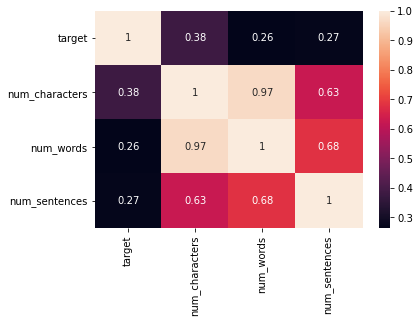

In [40]:
sns.heatmap(data.corr(),annot=True)

###### A heatmap which tells about the correlation between variables in the dataset.

###### Highest positive correlation is between num_characters and num_words. The least correlation is among target and num_words.¶

# 3. Data Preprocessing
 1)Lower case
 
 2)Tokenization
 
 3)Removing special characters
 
 4)Removing stop words and punctuation
 
 5)Stemming

In [41]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [43]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [46]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [48]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [49]:
data['transformed_text'] = data['text'].apply(transform_text)

<ipython-input-49-a7714d3a0533>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['text'].apply(transform_text)


In [50]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
import wordcloud

###### Wordcloud
It is a visual representation of text data, in which the size of each word indicates its frequency or importance.

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [53]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

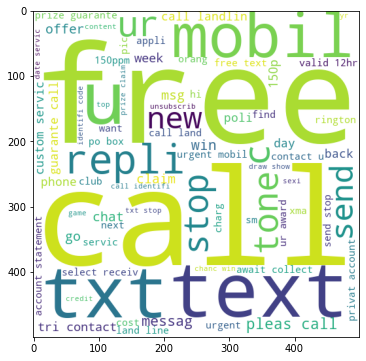

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

###### This is the wordcloud of spam mails.It is clear from the wordcloud that 'free' and 'call' are most frequently repeated words in spam mails.

In [55]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

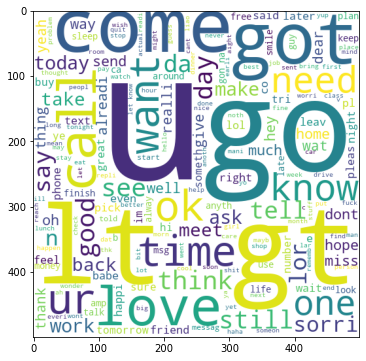

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

###### This is the wordcloud of ham mails.It is clear from the wordcloud that 'u' and 'go' are most frequently repeated words in ham mails.

In [57]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9941

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


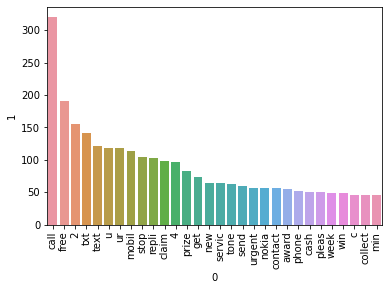

In [61]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

###### This shows the frequency of first 30 most frequently repeated words in spam. It is clear from the graph that the word 'call' has more frequency.

In [62]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
len(ham_corpus)

35303

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


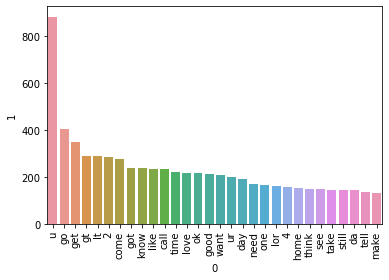

In [64]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

###### This shows the frequency of first 30 most frequently repeated words in ham. It is clear from the graph that the word 'u' has more frequency

In [63]:
# Text Vectorization
# using Bag of Words
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# DATA MODELING

##### We classify the mails into spam or ham using three models and will compare the accuracy of each model.
##### They are:

1)Logistic Regression

2)Support Vector Machine

3)Random Forest

In [65]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(data['transformed_text'], data['target'], test_size=0.2, random_state=0)
X_train.head()

3794                           also rememb bead come ever
4290                                          call u done
2603              arestaur eat squid wan na dosometh late
3452    nowaday peopl notixiqu laxinorf opportun bambl...
3132                                          messag food
Name: transformed_text, dtype: object

In [66]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} Accuracy Score:', '{:.2%}'.format(accuracy_score(y_valid, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='magma')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [67]:
X_train.isnull().any()

False

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [75]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_train = tfidf.fit_transform(X_train)
tfidf_matrix_valid= tfidf.transform(X_valid)

In [76]:
tfidf_matrix_train.shape

(4135, 3000)

In [78]:
tfidf_matrix_valid.shape

(1034, 3000)

### LOGISTIC REGRESSION

Logistic Regression: Accuracy Score: 96.13%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       885
           1       0.98      0.74      0.85       149

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



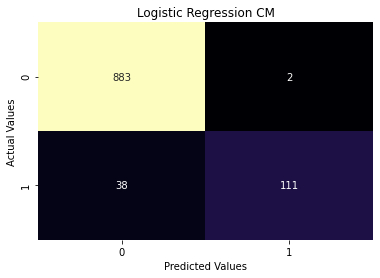

array([[883,   2],
       [ 38, 111]], dtype=int64)

In [79]:
#Training the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier=LogisticRegression(solver='liblinear')
log_reg_classifier.fit(tfidf_matrix_train, y_train)
y_pred_log=log_reg_classifier.predict(tfidf_matrix_valid)
my_confusion_matrix(y_valid, y_pred_log, 'Logistic Regression CM', 'Logistic Regression:')

### RANDOM FOREST

Random Forest Accuracy Score: 97.68%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       885
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



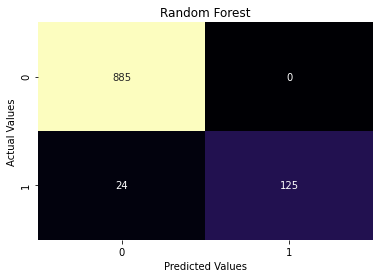

[[885   0]
 [ 24 125]]


In [80]:

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(tfidf_matrix_train, y_train)
y_pred_rfc=rfc.predict(tfidf_matrix_valid)
print(my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest', 'Random Forest'))


### SVM

SVC Accuracy Score: 97.78%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.98      0.86      0.92       149

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



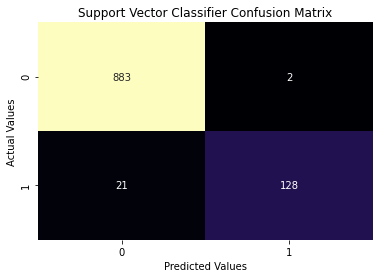

In [81]:

from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10)
svc.fit(tfidf_matrix_train, y_train)
y_pred_svc= svc.predict(tfidf_matrix_valid)
cm_svc=my_confusion_matrix(y_valid, y_pred_svc, 'Support Vector Classifier Confusion Matrix', 'SVC')

In [1]:
#plotting the comparison
import matplotlib.pyplot as plt
model=["Logistic Regression","Random Forest","SVM"]
accuracy=[96.13,97.68,97.78]

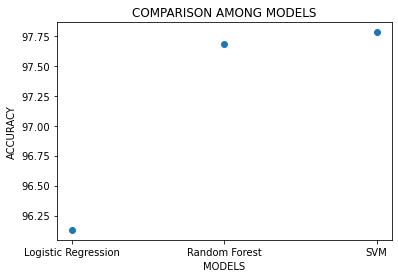

In [2]:
plt.scatter(model,accuracy)
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')
plt.title('COMPARISON AMONG MODELS')
plt.show()

#### CONCLUSION
##### It is clear that SVM has the highest accuracy.